<a href="https://colab.research.google.com/github/PranavBhasin001/AiScreen/blob/master/Econ_100b_Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Economics 100B (Summer 2019)

# Problem Set 1

## 1. Setup
----


### 1.1 Pre-Processing

### 1.2 Environment

In [0]:
#Importing Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
%matplotlib inline
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### 1.3 Files

In [0]:
# File Links
csv_file_cpiaucsl = {"link" : "https://drive.google.com/open?id=1uaO861xggI5ozd98bHv5SSqz43l0FLEx", "filename" : "CPIAUCSL.csv"}
csv_file_question_5 = {"link" : "https://drive.google.com/open?id=1WT3KhikL8DHvNSAtNszQg0dPKWRJLNdh", "filename" : "question5.csv"}
csv_file_question_6 = {"link" : "https://drive.google.com/open?id=1XztNarZNX8Bsdgx3Rokr0gwERL4P0j47", "filename" : "question6.csv"}

## 2. Processing

### 2.1 Functions

In [0]:
def import_file_and_read_to_dataframe(link, filename):
  fluff, id = link.split('=')
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(filename)
  df = pd.read_csv(filename)
  return df
  
def add_column_annual_quarter_inflation_rate(df, cpi_column, column_name, lower_range, upper_range):
  
  inflation_array = np.array([0, 0, 0, 0])
  
  for i in range(lower_range + 4, upper_range):
    prev = float(df[cpi_column][i - 4])
    curr = float(df[cpi_column][i])
    inflation_array = np.append(inflation_array, (curr - prev)/prev)
  
  inflation_array = np.append(inflation_array, 0)
  
  df[column_name] = inflation_array

def get_year(date_in_string):
  return date_in_string[:3]

def add_column_log_ratios(df, new_column_name, numerator, denominator):
  log_ratios = np.log(np.divide(numerator, denominator))
  df[new_column_name] = log_ratios
  
  


###2.2 Files

In [0]:
# Importing Files
df_cpiauscl = import_file_and_read_to_dataframe(csv_file_cpiaucsl["link"], csv_file_cpiaucsl["filename"])
df_question_5 = import_file_and_read_to_dataframe(csv_file_question_5["link"], csv_file_question_5["filename"])
df_question_6 = import_file_and_read_to_dataframe(csv_file_question_6["link"], csv_file_question_6["filename"])


#### 2.2.1 Question 4

In [5]:
# Access DataFrame
df_cpiauscl.head(5)

,DATE,CPIAUCSL
0,1947-01-01,21.7000000000000000
1,1947-04-01,22.0100000000000000
2,1947-07-01,22.4900000000000000
3,1947-10-01,23.1266666666666667
4,1948-01-01,23.6166666666666667


In [0]:
# Creating Column Annual Inflation Rate
add_column_annual_quarter_inflation_rate(df_cpiauscl, "CPIAUCSL", "INFLATION RATE", 0, len(df_cpiauscl) -1 )

In [7]:
# Show Updated DataFrame
df_cpiauscl.head(9)

,DATE,CPIAUCSL,INFLATION RATE
0,1947-01-01,21.7000000000000000,0.000000
1,1947-04-01,22.0100000000000000,0.000000
2,1947-07-01,22.4900000000000000,0.000000
3,1947-10-01,23.1266666666666667,0.000000
4,1948-01-01,23.6166666666666667,0.088326
5,1948-04-01,23.9933333333333333,0.090111
6,1948-07-01,24.3966666666666667,0.084778
7,1948-10-01,24.1733333333333333,0.045258
8,1949-01-01,23.9433333333333333,0.013832


In [8]:
# Dropping First 4 Rows
df_cpiauscl_year_inflation_rate = df_cpiauscl.drop(df_cpiauscl.index[[0, 1, 2, 3]])
df_cpiauscl_year_inflation_rate.head(5)

,DATE,CPIAUCSL,INFLATION RATE
4,1948-01-01,23.6166666666666667,0.088326
5,1948-04-01,23.9933333333333333,0.090111
6,1948-07-01,24.3966666666666667,0.084778
7,1948-10-01,24.1733333333333333,0.045258
8,1949-01-01,23.9433333333333333,0.013832


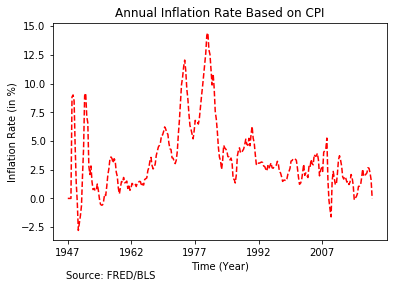

In [9]:
plt.plot(df_cpiauscl["DATE"], df_cpiauscl["INFLATION RATE"]*100, 'r--')
plt.ylabel("Inflation Rate (in %)")
plt.xlabel("Time (Year)")
plt.title("Annual Inflation Rate Based on CPI")
ticks = np.arange(0, 289, 60.4167)
ticks_labels = np.arange(1947, 2019, 15)
plt.xticks(ticks, ticks_labels)
plt.text(-2, -7, "Source: FRED/BLS")
plt.show()

### 2.2.2 Question 5

2.2.2.(a)

In [10]:
# Calculated indices for capital and labor
df_question_5.head(10)

,Year,Total Fixed Capital in 1880 dollars,Relative Total Capital (1899 = 100) (Indices for Capital),Average Number employed (in thousands),Relative Number (1899=100) (Indices For Labor),Index Of Manufacture
0,1899,4449,100.000000,4713,100.000000,100
1,1900,4746,106.675657,4968,105.410567,101
2,1901,5061,113.755900,5184,109.993635,112
3,1902,5444,122.364576,5554,117.844261,122
4,1903,5806,130.501236,5784,122.724379,124
5,1904,6132,137.828726,5468,116.019521,122
6,1905,6626,148.932344,5906,125.312964,148
7,1906,7237,162.665768,6251,132.633142,152
8,1907,7832,176.039559,6488,137.661787,151
9,1908,8220,184.760620,5714,121.239126,126


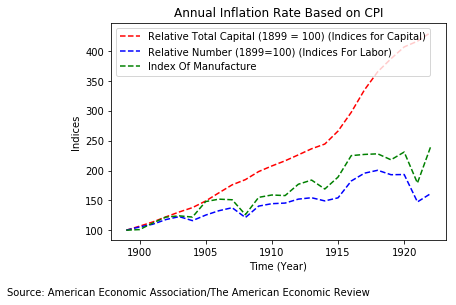

In [11]:
plt.plot(df_question_5["Year"], df_question_5["Relative Total Capital (1899 = 100) (Indices for Capital)"], 'r--')
plt.plot(df_question_5["Year"], df_question_5["Relative Number (1899=100) (Indices For Labor)"], 'b--')
plt.plot(df_question_5["Year"], df_question_5["Index Of Manufacture"], 'g--')
plt.ylabel("Indices")
plt.xlabel("Time (Year)")
plt.title("Annual Inflation Rate Based on CPI")
ticks = (np.arange(1947, 2020, 10))
plt.text(1890,-10, "Source: American Economic Association/The American Economic Review")
plt.legend()
plt.show()

2.2.2.(b)

In [12]:
add_column_log_ratios(df_question_5,
                      "Ln (K/L)",
                      df_question_5["Relative Total Capital (1899 = 100) (Indices for Capital)"],
                      df_question_5["Relative Number (1899=100) (Indices For Labor)"])
df_question_5.head(10)

,Year,Total Fixed Capital in 1880 dollars,Relative Total Capital (1899 = 100) (Indices for Capital),Average Number employed (in thousands),Relative Number (1899=100) (Indices For Labor),Index Of Manufacture,Ln (K/L)
0,1899,4449,100.000000,4713,100.000000,100,0.000000
1,1900,4746,106.675657,4968,105.410567,101,0.011930
2,1901,5061,113.755900,5184,109.993635,112,0.033632
3,1902,5444,122.364576,5554,117.844261,122,0.037641
4,1903,5806,130.501236,5784,122.724379,124,0.061442
5,1904,6132,137.828726,5468,116.019521,122,0.172253
6,1905,6626,148.932344,5906,125.312964,148,0.172678
7,1906,7237,162.665768,6251,132.633142,152,0.204111
8,1907,7832,176.039559,6488,137.661787,151,0.245909
9,1908,8220,184.760620,5714,121.239126,126,0.421296


In [13]:
add_column_log_ratios(df_question_5,
                      "Ln (Y/L)",
                      df_question_5["Index Of Manufacture"],
                      df_question_5["Relative Number (1899=100) (Indices For Labor)"])
df_question_5.head(10)

,Year,Total Fixed Capital in 1880 dollars,Relative Total Capital (1899 = 100) (Indices for Capital),Average Number employed (in thousands),Relative Number (1899=100) (Indices For Labor),Index Of Manufacture,Ln (K/L),Ln (Y/L)
0,1899,4449,100.000000,4713,100.000000,100,0.000000,0.000000
1,1900,4746,106.675657,4968,105.410567,101,0.011930,-0.042742
2,1901,5061,113.755900,5184,109.993635,112,0.033632,0.018076
3,1902,5444,122.364576,5554,117.844261,122,0.037641,0.034657
4,1903,5806,130.501236,5784,122.724379,124,0.061442,0.010341
5,1904,6132,137.828726,5468,116.019521,122,0.172253,0.050263
6,1905,6626,148.932344,5906,125.312964,148,0.172678,0.166398
7,1906,7237,162.665768,6251,132.633142,152,0.204111,0.136294
8,1907,7832,176.039559,6488,137.661787,151,0.245909,0.092480
9,1908,8220,184.760620,5714,121.239126,126,0.421296,0.038517


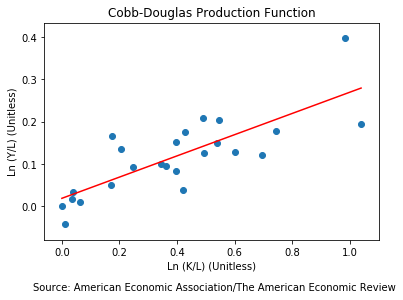

In [14]:
plt.scatter(df_question_5["Ln (K/L)"], df_question_5["Ln (Y/L)"])
plt.ylabel("Ln (Y/L) (Unitless)")
plt.xlabel("Ln (K/L) (Unitless)")
a, b = np.polyfit(df_question_5["Ln (K/L)"], df_question_5["Ln (Y/L)"], 1)
plt.plot(np.unique(df_question_5["Ln (K/L)"]), np.poly1d(np.polyfit(df_question_5["Ln (K/L)"], df_question_5["Ln (Y/L)"], 1))(np.unique(df_question_5["Ln (K/L)"])),c="r")
plt.title("Cobb-Douglas Production Function")
plt.text(-.1,-0.2, "Source: American Economic Association/The American Economic Review")
plt.show()

2.2.2.(c)

In [15]:
print ("Coefficient of Capital/Slope:", a)
print ("Intercept:", b)
print ("Total Factor Productivity:", np.round(np.exp(b),3))

Coefficient of Capital/Slope: 0.250983482641662
Intercept: 0.018830244999121403
Total Factor Productivity: 1.019


My regression results agree with the results of Cobb-Douglas's when rounded to two decimal places

In [16]:
np.exp(b)

1.0190086521196773

In [0]:
#### 2.2.3 Question 6

#### 2.2.3 Question 6

2.2.3 (a)

In [18]:
# Calculated Indices of Labor, Capital and Output Based on Year 1952
df_question_6.head(6)

,country,year,emp,cgdpe,cn,Index of Labor,Index of Capital,Index of Output
0,China,1952,238.959076,616679.8750,335618.2813,100.000000,100.000000,100.000000
1,China,1953,244.866730,698142.5625,351050.9688,102.472245,104.598286,113.209883
2,China,1954,250.613724,642718.0000,368821.9063,104.877257,109.893271,104.222308
3,China,1955,256.240387,711235.0625,390270.7813,107.231912,116.284125,115.332945
4,China,1956,263.829926,748154.8750,427058.2188,110.407995,127.245220,121.319814
5,China,1957,272.241486,769214.1250,453914.5000,113.928079,135.247251,124.734754


In [19]:
# Log-Ratio
add_column_log_ratios(df_question_6,
                      "Ln (K/L)",
                      df_question_6["Index of Capital"],
                      df_question_6["Index of Labor"])
add_column_log_ratios(df_question_6,
                      "Ln (Y/L)",
                      df_question_6["Index of Output"],
                      df_question_6["Index of Labor"])
df_question_6.head(10)

,country,year,emp,cgdpe,cn,Index of Labor,Index of Capital,Index of Output,Ln (K/L),Ln (Y/L)
0,China,1952,238.959076,616679.8750,335618.2813,100.000000,100.000000,100.000000,0.000000,0.000000
1,China,1953,244.866730,698142.5625,351050.9688,102.472245,104.598286,113.209883,0.020535,0.099651
2,China,1954,250.613724,642718.0000,368821.9063,104.877257,109.893271,104.222308,0.046719,-0.006264
3,China,1955,256.240387,711235.0625,390270.7813,107.231912,116.284125,115.332945,0.081043,0.072829
4,China,1956,263.829926,748154.8750,427058.2188,110.407995,127.245220,121.319814,0.141934,0.094248
5,China,1957,272.241486,769214.1250,453914.5000,113.928079,135.247251,124.734754,0.171537,0.090622
6,China,1958,292.516815,755777.5625,490738.9375,122.412934,146.219370,122.555899,0.177708,0.001167
7,China,1959,304.346558,694574.4375,560070.3125,127.363464,166.877177,112.631280,0.270213,-0.122925
8,China,1960,294.654388,661612.8125,619764.5625,123.307469,184.663529,107.286266,0.403854,-0.139180
9,China,1961,284.967987,579815.9375,632326.9375,119.253887,188.406584,94.022192,0.457348,-0.237724


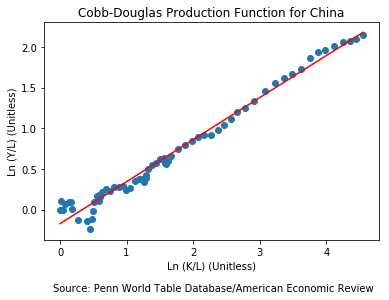

In [20]:
#Using Regression Model, and Graphing of Log Ratio from Question 5
plt.scatter(df_question_6["Ln (K/L)"], df_question_6["Ln (Y/L)"])
plt.ylabel("Ln (Y/L) (Unitless)")
plt.xlabel("Ln (K/L) (Unitless)")
a_6, b_6 = np.polyfit(df_question_6["Ln (K/L)"], df_question_6["Ln (Y/L)"], 1)
plt.plot(np.unique(df_question_6["Ln (K/L)"]), np.poly1d(np.polyfit(df_question_6["Ln (K/L)"], df_question_6["Ln (Y/L)"], 1))(np.unique(df_question_6["Ln (K/L)"])),c="r")
plt.title("Cobb-Douglas Production Function for China")
plt.text(-.1,-1, "Source: Penn World Table Database/American Economic Review")
plt.show()

2.2.3.(b)

In [21]:
print ("Coefficient of Capital/Slope:", a_6)
print ("Intercept:", b_6)
print ("Total Factor Productivity:", np.exp(b_6))

Coefficient of Capital/Slope: 0.5169682422065114
Intercept: -0.17429428877913705
Total Factor Productivity: 0.8400496440940661


We see that the coefficient of capital is almost double for China in Question 6 as compared to the case in Question  5, and Total Factor Productivity: is smaller for China. The smaller Total Factor Productivity for China shows less effectiveness with which the factors of production are used. While the larger coefficient of capital shows an increase in capital would lead to a larger increase in output in question 6.